In [7]:
import tensorflow as tf
import numpy as np
from keras.preprocessing import image
from keras.models import load_model
import matplotlib.pyplot as plt
from transformers import (
    ViTImageProcessor,
    TFSwiftFormerForImageClassification,
)

import pickle

In [8]:
CLASS_NAMES = ['Heart', 'Oblong', 'Oval', 'Round', 'Square'] # jangan diubah urutannya

In [3]:
# model = load_model("models/swiftformer/faceshape_swiftformer_xs.h5") # load .h5

# For swiftformer
model = TFSwiftFormerForImageClassification.from_pretrained('/Users/rafaelrnzo/Proj/Proj/Lantech/tiebymin-be/tiebymin-be-v1/swiftformer')


TensorFlow and JAX classes are deprecated and will be removed in Transformers v5. We recommend migrating to PyTorch classes or pinning your version of Transformers.
All model checkpoint layers were used when initializing TFSwiftFormerForImageClassification.

All the layers of TFSwiftFormerForImageClassification were initialized from the model checkpoint at /Users/rafaelrnzo/Proj/Proj/Lantech/tiebymin-be/tiebymin-be-v1/swiftformer.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFSwiftFormerForImageClassification for predictions without further training.


In [9]:
# SwiftFormer processor
def preprocess_image(img_path):
    img = image.load_img(img_path)
    processor = ViTImageProcessor.from_pretrained('swiftformer', return_tensors = 'np')
    input = processor(img, return_tensors='np')
    return input

In [10]:
# SWIFTFORMER
def predict(img_path):
    img_tensor = preprocess_image(img_path)
    predictions = model.predict(img_tensor)

    predicted_index = np.argmax(predictions.logits, axis=1)[0]

    predicted_label = CLASS_NAMES[predicted_index]
    print(predictions.logits)
    probabilities = tf.nn.softmax(predictions.logits, axis=-1).numpy()
    print(probabilities)
    confidence = probabilities[0][predicted_index]


    print(f"Predicted label: {predicted_label} (confidence: {confidence:.2f})")

    plt.imshow(image.load_img(img_path))
    plt.title(f"Prediction: {predicted_label}")
    plt.axis('off')
    plt.show()

1/1 [==============================] - 0s 94ms/step
[[-0.9881575   1.3137735   0.9128752  -0.87621456 -1.2891574 ]]
[[0.05116453 0.51131076 0.34243408 0.05722492 0.03786573]]
Predicted label: Oblong (confidence: 0.51)


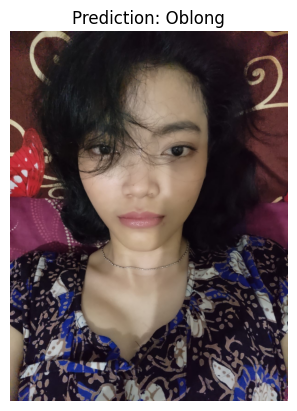

In [11]:
predict("/Users/rafaelrnzo/Proj/Proj/Lantech/tiebymin-be/tiebymin-be-v1/image.png")